In [328]:
import importlib

import src.Data as Data
importlib.reload(Data)
Data = Data.Data

import src.Metrics as Metrics
importlib.reload(Metrics)
Metrics = Metrics.Metrics

In [307]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import LearningCurveDisplay, learning_curve, cross_validate, train_test_split
import numpy as np
import pandas as pd

In [308]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

classifiers = [
    DecisionTreeClassifier(), 
    RandomForestClassifier(n_jobs=-1), 
    BaggingClassifier(n_jobs=-1), 
    LogisticRegression(n_jobs=-1), 
    # SVC(), 
    # GaussianNB(), 
    # SGDClassifier(n_jobs=-1), 
    # KNeighborsClassifier(n_jobs=-1), 
    # GradientBoostingClassifier(), 
    # MLPClassifier(), 
    # AdaBoostClassifier()
]

In [329]:
data: Data = Data()

Fit the model without cross-validation or hyperparameter tuning. 


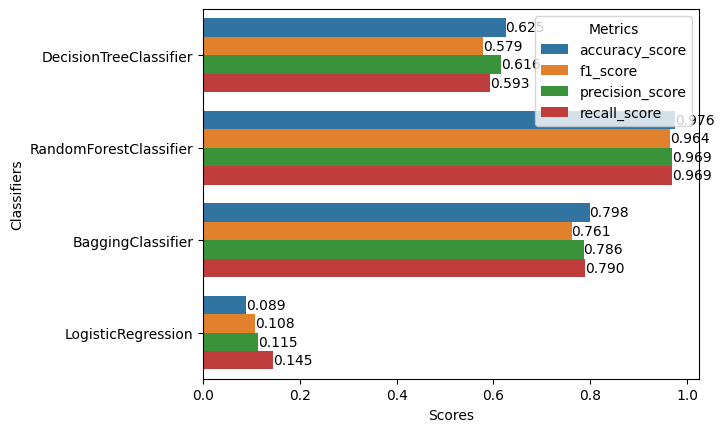

In [310]:
print('Fit the model without cross-validation or hyperparameter tuning. \n')

metrics_list = []
for classifier in classifiers:
    classifier.fit(data.x_train, data.y_train)
    metrics_list.append(Metrics(classifier, data))

Metrics.show_metrics_list(metrics_list)

Fit the model with cross-validation.

Classifier : DecisionTreeClassifier
	Mean train score : 1.0
	Mean test score : 0.6898989898989899


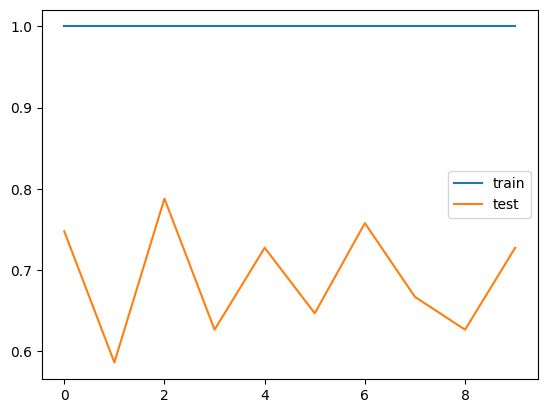



Classifier : RandomForestClassifier
	Mean train score : 1.0
	Mean test score : 0.983838383838384


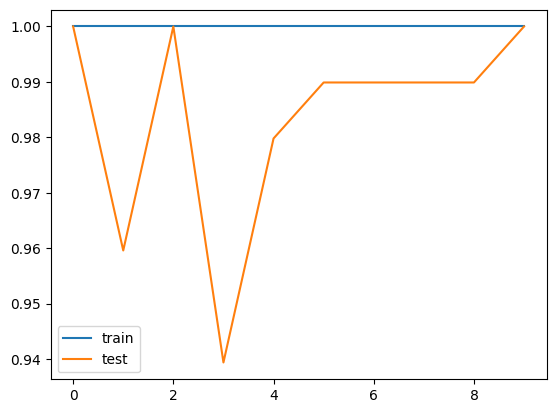



Classifier : BaggingClassifier
	Mean train score : 0.9994388327721662
	Mean test score : 0.8868686868686868


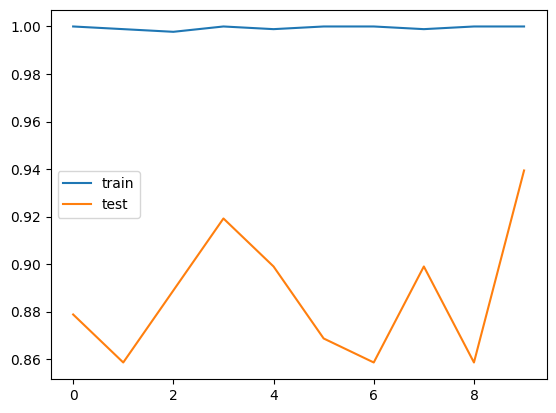



Classifier : LogisticRegression
	Mean train score : 0.6727272727272726
	Mean test score : 0.6


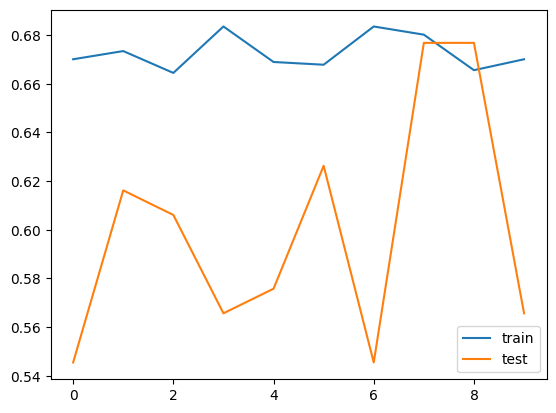

In [319]:
print('Fit the model with cross-validation.\n')

for classifier in classifiers:
    print(f'Classifier : {classifier.__class__.__name__}')

    scores = cross_validate(classifier, data.x_tab, data.y_tab, cv=10, n_jobs=-1, return_train_score=True)
    classifier.fit(data.x_train, data.y_train)
    # print(Metrics(classifier, data))
    print(f'\tMean train score : {scores["train_score"].mean()}')
    print(f'\tMean test score : {scores["test_score"].mean()}')
    
    plot_cross_validation: bool = True
    if plot_cross_validation:
        # Plot graph of scores
        plt.figure()
        plt.plot(scores['train_score'], label='train')
        plt.plot(scores['test_score'], label='test')
        plt.legend()
        plt.show()
    
    print('\n')

Fit model with cross-validation for different training set sizes.

Classifier : DecisionTreeClassifier
	Mean train score : 1.0
	Mean test score : 0.47717171717171714


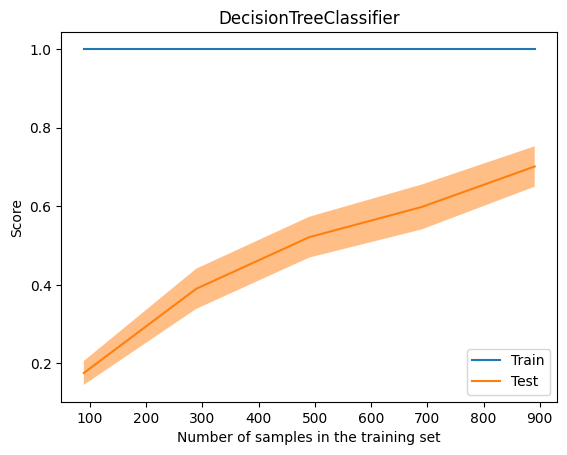

Classifier : RandomForestClassifier


/Library/Python/3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


	Mean train score : 1.0
	Mean test score : 0.8242424242424242


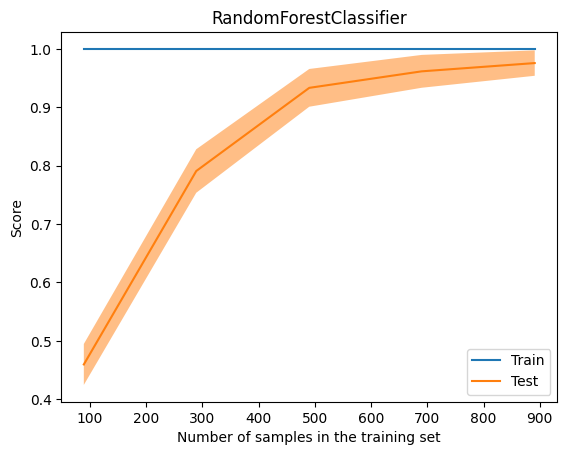

Classifier : BaggingClassifier


/Library/Python/3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


	Mean train score : 0.9966260073697246
	Mean test score : 0.623030303030303


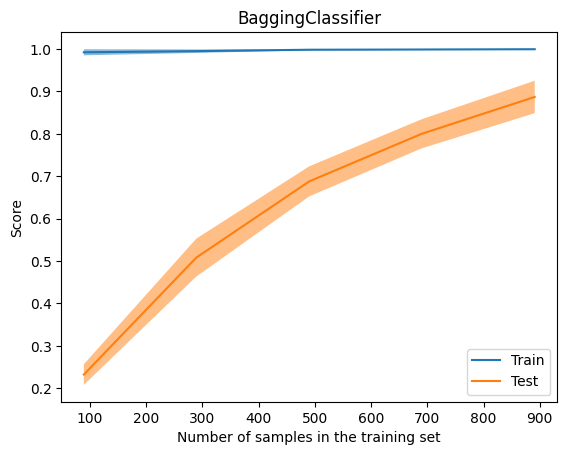

Classifier : LogisticRegression
	Mean train score : 0.29387593444855686
	Mean test score : 0.21838383838383835


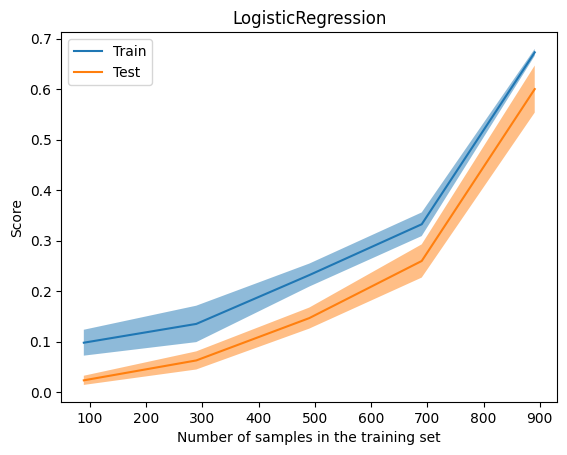

In [321]:
print('Fit model with cross-validation for different training set sizes.\n')

for classifier in classifiers:
    print(f'Classifier : {classifier.__class__.__name__}')
    # Determines cross-validated training and test scores for different training set sizes.
    # [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve)
    #   cv -> cv-fold cross-validation.
    #   n_jobs -> number of jobs to run in parallel : -1 means using all processors.
    #   No need to shuffle the data because it has already been shuffled (within Data class).
    train_sizes_abs, train_scores, test_scores = learning_curve(classifier, data.x_tab, data.y_tab, cv=10, n_jobs=-1)
    
    classifier.fit(data.x_train, data.y_train)
    print(f'\tMean train score : {train_scores.mean()}')
    print(f'\tMean test score : {test_scores.mean()}')
    
    plot_learning_curve: bool = True
    if plot_learning_curve:
        display = LearningCurveDisplay(train_sizes=train_sizes_abs, train_scores=train_scores, test_scores=test_scores, score_name="Score")
        display.plot()
        display.ax_.set_title(classifier.__class__.__name__)
        plt.show()
    
    # for train_size, cv_train_scores, cv_test_scores in zip(train_sizes_abs, train_scores, test_scores):
    #     print(f"{train_size} samples were used to train the model")
    #     print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    #     print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

Leafs speacies from the dataset : 


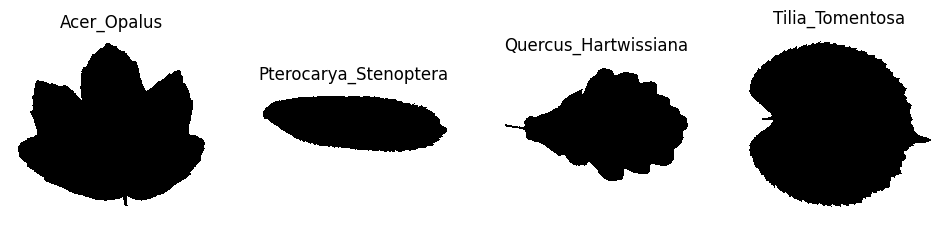

In [324]:
# Classification with images. 

print('Leafs speacies from the dataset : ')
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for ax, image, label in zip(axes, data.x_image_tab, data.y_tab):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f'{label}')

In [325]:
# Create a classifier: a support vector classifier
# clf = svm.SVC(gamma=0.001)
clf = RandomForestClassifier(n_jobs=-1)
# clf = KNeighborsClassifier(6, n_jobs=-1)
# clf = LinearDiscriminantAnalysis()
# clf = AdaBoostClassifier()
# clf = GradientBoostingClassifier()

# Learn the digits on the train subset
clf.fit(data.x_image_train, data.y_image_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(data.x_image_test)

Those images are smaller than the original ones, because they have been resized.

Predicted values : 


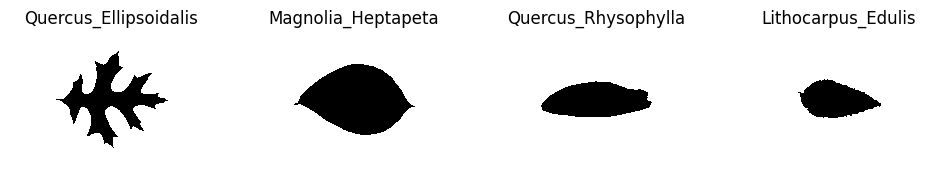

In [326]:
print('Those images are smaller than the original ones, because they have been resized.\n')

print('Predicted values : ')
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for ax, image, prediction in zip(axes, data.x_image_test, predicted):
    ax.set_axis_off()
    image = image.reshape(data.resized_images_width, data.resized_images_height)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f'{prediction}')

Classification report for classifier RandomForestClassifier(n_jobs=-1):
                              precision    recall  f1-score   support

             Acer_Capillipes       1.00      1.00      1.00         1
             Acer_Circinatum       1.00      0.50      0.67         2
                   Acer_Mono       1.00      1.00      1.00         5
                 Acer_Opalus       0.33      1.00      0.50         1
               Acer_Palmatum       0.50      1.00      0.67         2
                 Acer_Pictum       1.00      1.00      1.00         2
             Acer_Platanoids       1.00      1.00      1.00         1
                 Acer_Rubrum       0.60      1.00      0.75         3
              Acer_Rufinerve       1.00      0.75      0.86         4
            Acer_Saccharinum       1.00      0.20      0.33         5
               Alnus_Cordata       0.33      1.00      0.50         1
          Alnus_Maximowiczii       0.00      0.00      0.00         2
                 

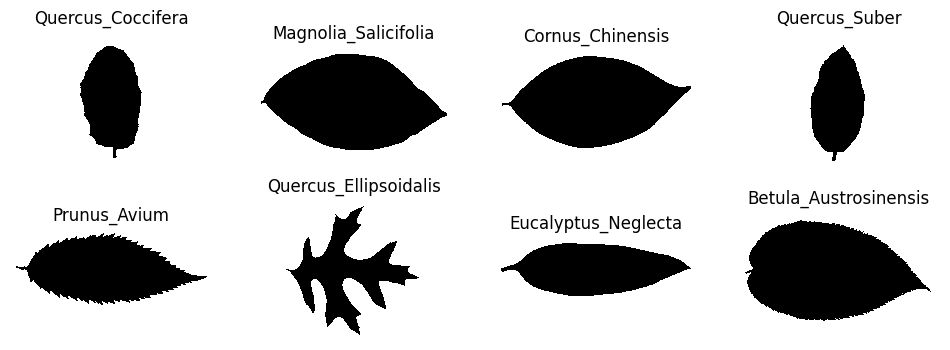

In [327]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(data.y_image_test, predicted)}\n"
)

report = metrics.classification_report(data.y_image_test, predicted, output_dict=True)
df = pd.DataFrame(report).transpose()
# Some targets are missing in the test set and due to this fact, the precision and recall are replaced by 0.
# So, we will remove them from the report.
df = df[df['f1-score'] != 0]

# Then, we keep the 10 leaf species with the worst f1-score.
worst_leaf_names = df.sort_values(by=['f1-score'], ascending=True)[:10].index.values

worst_leaf_indexes = [np.where(data.y_tab == name)[0][0] for name in worst_leaf_names]
worst_images = [data.x_image_tab[i] for i in worst_leaf_indexes]
worst_labels = [data.y_tab[i] for i in worst_leaf_indexes]

print('The leaf species with the worst f1-score are the next ones: ')
_, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 4))
for ax, image, label in zip(axes.flatten(), worst_images, worst_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f'{label}')